## 基础
### Sequential models

相对于TensorFlow的张量计算图，keras其实将神经网络里的一些模块进行了封装抽象，是一种更高抽象的封装，更接近神经网络的模型，。keras中的model就是神经网络模型，具体的网络结构如MLP、CNN、LSTM等，在Keras中它们被分为两种：有序模型(Sequential)和函数式模型(Model)。

Sequential模型就是一个直接由若干网络层线性堆叠起来的网络，就像pipline一样的顺序进行，所以玩keras就像在搭积木，使用如下代码创建一个Sequential对象：

In [34]:
from keras.models import Sequential
from keras.layers import Dense,Activation
model = Sequential()

Sequential的构造函数可以接收一个由layer组成的list，用以初始化该model。  
模型需要知道输入数据的shape，因此，Sequential的第一层需要接受一个关于输入数据shape的参数，后面的各个层则可以自动的推导出中间数据的shape，因此不需要为每个层都指定这个参数。有几种方法来为第一层指定输入数据的shape  

- 传递一个input_shape的关键字参数给第一层，input_shape是一个tuple类型的数据，其中也可以填入None，如果填入None则表示此位置可能是任何正整数。数据的batch大小不应包含在其中。

In [36]:
model = Sequential([
    Dense(32, input_shape=(784,)),#一个Dense层，即全连接层
    Activation('relu'),#为上一个Dense层附加激活函数
    Dense(10),#再添加一个Dense层
    Activation('softmax'),#为上一个Dense层附加激活函数
])

也可以使用.add()方法对该model初始化：

In [37]:
model.add(Dense(32, input_shape=(784,)))
model.add(Activation('relu'))

- 有些2D层，如Dense，支持通过指定其输入维度input_dim来隐含的指定输入数据shape,是一个Int类型的数据。一些3D的时域层支持通过参数input_dim和input_length来指定输入shape。

In [38]:
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

### Dense layer  
Dense就是常用的全连接层，所实现的运算是output = activation(dot(input, kernel)+bias)。其中activation是逐元素计算的激活函数，kernel是本层的权值矩阵，bias为偏置向量，只有当use_bias=True才会添加。  
构造方法如下：

In [39]:
import keras
keras.layers.core.Dense(
  units=1,
  activation=None,
  use_bias=True,
  kernel_initializer='glorot_uniform',
  bias_initializer='zeros',
  kernel_regularizer=None,
  bias_regularizer=None,
  activity_regularizer=None,
  kernel_constraint=None,
  bias_constraint=None)

units：大于0的整数，表示该层输出维度。  
activation：激活函数。  
use_bias：是否使用偏置。  
kernel_initializer：权值矩阵初始化方法。  
bias_initializer：偏置的初始化方法。  
regularizer与constraint：正则项与约束项。  
  
我们可以使用前文提到的.add()方法为model添加全连接层，只有输入层需要指定输入数据维度，之后的层不需再指定前一层的维度。

### Activation层
激活层对一个层的输出施加激活函数,比如sigmoid函数
参数  
activation：将要使用的激活函数，为预定义激活函数名或一个Tensorflow/Theano的函数。参考激活函数  
输入shape  
任意，当使用激活层作为第一层时，要指定input_shape  

输出shape
与输入shape相同

In [40]:
model.add(Activation('sigmoid'))

###  Dropout层
Dropout是在神经网络中用来解决过拟合问题的一种方法。从名字可以直观看出就是丢弃一些东西，就像在回归中用的L1和L2正则惩罚一样，会将一些权重变为接近0 ，从而使得一些低相关特征的影响消失，避免过拟合。 Dropout将在训练过程中每次更新参数时按一定概率（rate）随机断开输入神经元，Dropout层用于防止过拟合。对于神经网络就是dropout一些神经元。  
具体来说比如设置dropout为0.5，那么在每次的神经网络的反向传播中，会按0.5概率随机选择一些神经元，将反向传播对应的参数设为0，然后对于被改变后的神经网络进行反向传播。

参数
- rate：0~1的浮点数，控制需要断开的神经元的比例
- noise_shape：整数张量，为将要应用在输入上的二值Dropout mask的shape，例如你的输入为(batch_size, timesteps, features)，并且你希望在各个时间步上的Dropout mask都相同，则可传入noise_shape=(batch_size, 1, features)。
- seed：整数，使用的随机数种子

### compile 

model的结构设置好之后使用compile方法编译，就是配置学习的过程：

In [41]:
model.compile(
  #self,
  optimizer='rmsprop',
  loss='mse',
  metrics=None,
  sample_weight_mode=None)

- 优化器optimizer：预定义的优化器名称或自定义的优化器对象。  
- loss：要优化的预定义的损失函数名称或自定义的目标函数。
- 指标列表metrics：对分类问题，我们一般将该列表设置为metrics=['accuracy']。指标可以是一个预定义指标的名字,也可以是一个用户定制的函数.指标函数应该返回单个张量,或一个完成metric_name - > metric_value映射的字典.

### fit
编译后使用fit方法训练模型：

In [45]:
model.fit(
  self,
  x,
  y,
  batch_size=32,
  epochs=10,
  verbose=1,
  callbacks=None,
  validation_split=0.0,
  validation_data=None,
  shuffle=True,
  class_weight=None,
  sample_weight=None,
  initial_epoch=0)

NameError: name 'self' is not defined

x：作为输入数据的numpy array。  
y：作为标签的numpy array。  
batch_size：梯度下降时每个batch包含的样本数。  
epochs：训练总轮数。  
verbose：日志显示，0为不在标准输出流输出日志信息，1为输出进度条记录，2为每个epoch输出一行记录。  

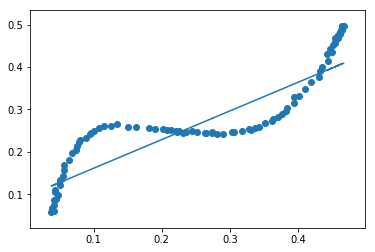

In [49]:
#使用keras进行编程
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import SGD
import pandas as pd
import numpy as np

def poly(file):
    #data = pd.read_csv('lousai-22-01.csv')
    data = pd.read_csv(file)
    datasets_X = np.array(data.iloc[:,0].values.reshape(-1,1))
    datasets_Y = np.array(data.iloc[:,1].values.reshape(-1,1))
    
    model = Sequential() #一层层到底，按順序
    #神经元个数越多,效果会越好,收敛越快,太少的话难以收敛到所需曲线
    model.add(Dense(100, input_shape=(1,)))

    #Relu,得到的是一条横线
    #Tanh,稍稍好于Relu,但是拟合的不够
    #sigmoid, 只要神经元个数足够(50+),训练1000轮以上,就能达到比较好的效果
    model.add(Activation('sigmoid'))
    #model.add(LeakyReLU(alpha=0.01))
    #model.add(Dense(3))

    model.add(Dense(1))
    sgd =  SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    #model.compile(optimizer="sgd", loss="mse")
    model.fit(datasets_X, datasets_Y, epochs=2000, verbose=0)
     
    
    plt.scatter(datasets_X, datasets_Y)
    plt.plot(datasets_X, 
             model.predict(datasets_X) 
        )
    
poly("lousai-22-01.csv")
